# Data Schema

<p align="center"><img src="./DataSchema.png"  width="800"></p>

# Analysis summary: 

### [Customers per Region Analysis:](#cpra)
* [Number of Customers per State](#nocps)
* [Number of Customers per City in SP - Top 30](#nocpcist30)
* [Cities with the highest number of customers in each State](#cwthnocies)
* [Top 50 customers](#t50c)

### [Top 20 Selling Items](#t20si)
### [Customer's Review Scores:](#crs)
* [Customer's Review Scores - Boxplot](#crsb)
* [Customer's Review Scores - Density](#crsdy)
* [Customer's Review Scores - Description](#crsdn)

### [Sails per Category](#spc)
### [Best Selling Categories - Top 20](#bsct20)
### [Revenue x Month (From 2016 to 2018)](#rxm)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_customers = pd.read_csv(".\datasets\olist_customers_dataset.csv")
df_geolocation = pd.read_csv(".\datasets\olist_geolocation_dataset.csv")
df_orderItems = pd.read_csv(".\datasets\olist_order_items_dataset.csv")
df_orderPayments = pd.read_csv(".\datasets\olist_order_payments_dataset.csv")
df_orderReviews = pd.read_csv(".\datasets\olist_order_reviews_dataset.csv")
df_orders = pd.read_csv(".\datasets\olist_orders_dataset.csv")
df_products = pd.read_csv(".\datasets\olist_products_dataset.csv")
df_sellers = pd.read_csv(".\datasets\olist_sellers_dataset.csv")
df_categoryNameTrans = pd.read_csv(".\datasets\product_category_name_translation.csv")

<a id='cpra'></a>

# Customers per Region Analysis
Objective - Discover in which areas the majority of customers are concentrated.

In [3]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [4]:
# Drop duplicated customer_unique_id cells. Each purchase generates a different customer_id code, so each customer_unique_id
# can be associated with different customer_id, however we just want each unique customer for the analysis.

df = df_customers.drop_duplicates(subset="customer_unique_id")

## Number of Customers per State

<a id='nocps'></a>

Text(0, 0.5, 'Customers')

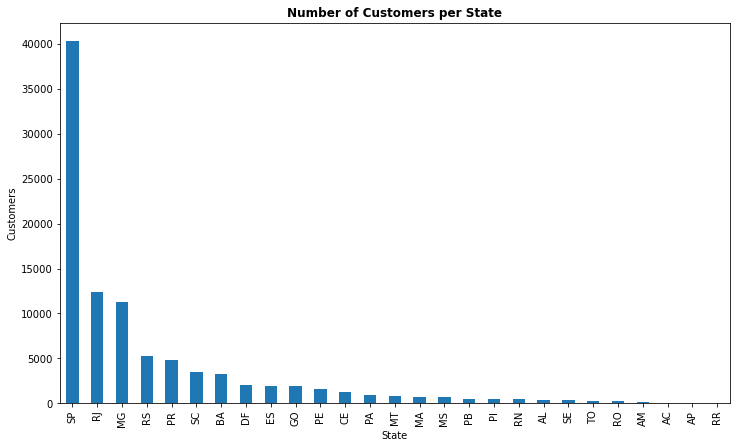

In [5]:
df["customer_state"].value_counts().plot.bar(figsize=(12,7))
plt.title("Number of Customers per State",fontweight="bold", fontsize=12)
plt.xlabel("State")
plt.ylabel("Customers")

## Number of Customers per City in SP - Top 30
Since SP state has the majority of the client's base, let's see in which cities they concentrate the most.

In [6]:
condition = df["customer_state"] == "SP"
df = df.loc[condition]

<a id='nocpcist30'></a>

Text(0, 0.5, 'Customers')

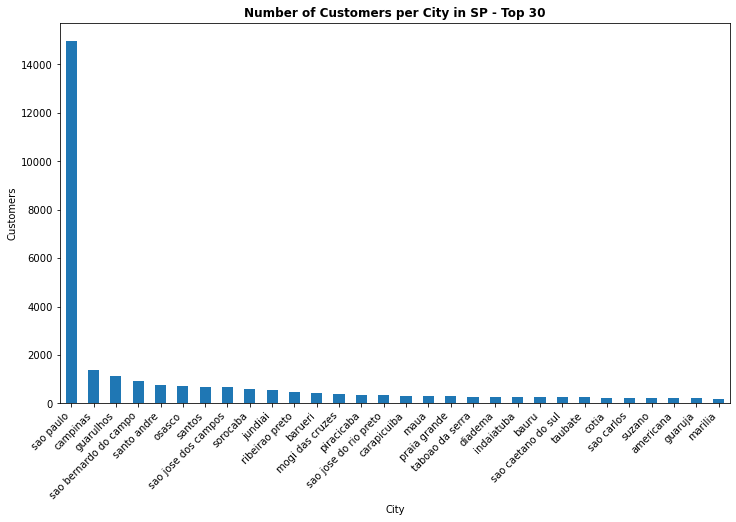

In [7]:
df["customer_city"].value_counts().head(30).plot.bar(figsize=(12,7))
plt.title("Number of Customers per City in SP - Top 30",fontweight="bold", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.xlabel("City")
plt.ylabel("Customers")

## Cities with the highest number of customers in each State
What cities have the majority of customers in each state?

In [8]:
# Drop duplicated customer_unique_id cells. Each purchase generates a different customer_id code, so each customer_unique_id
# can be associated with different customer_id, however we just want each unique customer for the analysis.

df = df_customers.drop_duplicates(subset="customer_unique_id")

In [9]:
# Count the number of customers in each city of each state

df2 = df.groupby(["customer_state", "customer_city"])["customer_unique_id"].count().reset_index()
df2.rename(columns={"customer_unique_id": "customers_count"}, inplace=True)
df2

,customer_state,customer_city,customers_count
0,AC,brasileia,1
1,AC,cruzeiro do sul,3
2,AC,epitaciolandia,1
3,AC,manoel urbano,1
4,AC,porto acre,1
...,...,...,...
4304,TO,silvanopolis,1
4305,TO,sitio novo do tocantins,1
4306,TO,taguatinga,3
4307,TO,tocantinopolis,7


In [10]:
# List the number of customers in the cities that have the biggest number of customers in each state 

max_per_state = []

# Loop through all the unique states to find out the cities that have the biggest number of customers
for state in df2["customer_state"].unique():
    df_temp = df2.loc[(df2.customer_state == str(state))]
    max_value = df_temp.max().customers_count
    max_per_state.append(max_value)

In [11]:
# Create a new dataframe with the cities that have the numbers collected by the max_per_state list. Sort it by customers_count.

df_city_per_state = df2.loc[(df2.customers_count.isin(max_per_state))].sort_values(by=['customers_count', 
                                                                                       'customer_state'], ascending=False)
df_city_per_state

,customer_state,customer_city,customers_count
4175,SP,sao paulo,14971
2787,RJ,rio de janeiro,6611
1061,MG,belo horizonte,2671
601,DF,brasilia,2066
2405,PR,curitiba,1462
3207,RS,porto alegre,1326
372,BA,salvador,1208
770,GO,goiania,671
493,CE,fortaleza,642
2201,PE,recife,586


In [12]:
# Since there may be cities in other states that have the same count as the city with highest count in a given state
# (For example: MG's highest count is 366 in Uberlandia, but Vitoria in ES also have the same count), we need to drop the
# duplicated states in the dataframe. Then, we'll have the dataframe that we want.

# Also, create another column with city and state together, so it's possible to see it on the chart.

df_city_per_state = df_city_per_state.drop_duplicates(subset='customer_state')
df_city_per_state["city_and_state"] = df_city_per_state["customer_city"].str.title() + " (" + df_city_per_state["customer_state"] + ")"

df_city_per_state

<ipython-input-12-cc43b8d1e1f8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_per_state["city_and_state"] = df_city_per_state["customer_city"].str.title() + " (" + df_city_per_state["customer_state"] + ")"


,customer_state,customer_city,customers_count,city_and_state
4175,SP,sao paulo,14971,Sao Paulo (SP)
2787,RJ,rio de janeiro,6611,Rio De Janeiro (RJ)
1061,MG,belo horizonte,2671,Belo Horizonte (MG)
601,DF,brasilia,2066,Brasilia (DF)
2405,PR,curitiba,1462,Curitiba (PR)
3207,RS,porto alegre,1326,Porto Alegre (RS)
372,BA,salvador,1208,Salvador (BA)
770,GO,goiania,671,Goiania (GO)
493,CE,fortaleza,642,Fortaleza (CE)
2201,PE,recife,586,Recife (PE)


<a id='cwthnocies'></a>

Text(0, 0.5, 'Customers')

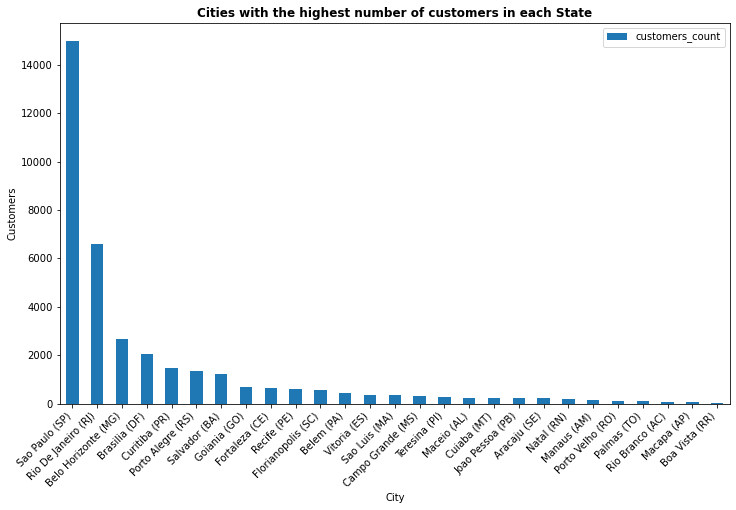

In [13]:
df_city_per_state.plot.bar(x="city_and_state", y="customers_count", figsize=(12,7))
plt.title("Cities with the highest number of customers in each State",fontweight="bold", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.xlabel("City")
plt.ylabel("Customers")

## Top 50 customers
Who are the customers that buy the most?

<a id='t50c'></a>

In [14]:
top50_customers = df_customers.groupby('customer_unique_id')["customer_id"].count().sort_values(ascending=False).head(50).reset_index()
top50_customers.rename(columns={"customer_id": "number_of_orders"}, inplace=True)

top50_customers

,customer_unique_id,number_of_orders
0,8d50f5eadf50201ccdcedfb9e2ac8455,17
1,3e43e6105506432c953e165fb2acf44c,9
2,6469f99c1f9dfae7733b25662e7f1782,7
3,ca77025e7201e3b30c44b472ff346268,7
4,1b6c7548a2a1f9037c1fd3ddfed95f33,7
5,12f5d6e1cbf93dafd9dcc19095df0b3d,6
6,de34b16117594161a6a89c50b289d35a,6
7,63cfc61cee11cbe306bff5857d00bfe4,6
8,f0e310a6839dce9de1638e0fe5ab282a,6
9,47c1a3033b8b77b3ab6e109eb4d5fdf3,6


# Top 20 Selling Items
Objective - Discover what are the items that sell the most.

In [15]:
df_orderItems

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


<a id='t20si'></a>

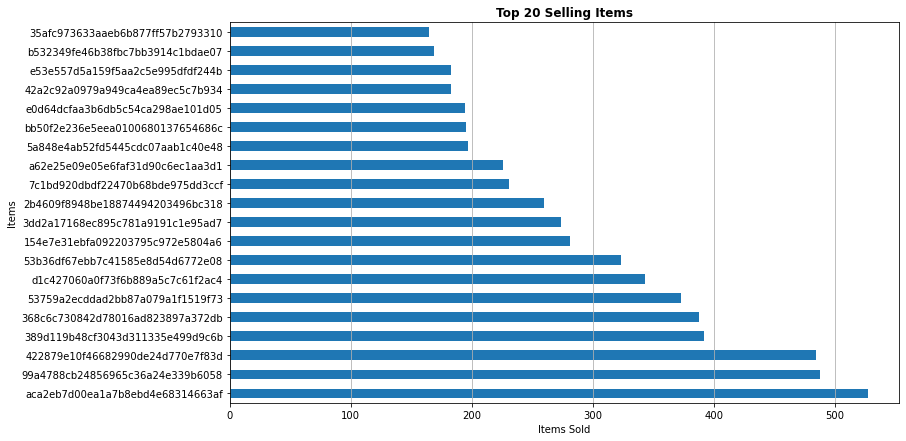

In [16]:
# Group by the amount of times that an item was sold and sort the values.

df_orderItems.groupby("product_id").size().sort_values(ascending=False).head(20).plot.barh(figsize=(12,7))
plt.title("Top 20 Selling Items",fontweight="bold", fontsize=12)
plt.xlabel("Items Sold")
plt.ylabel("Items")
plt.grid(axis = 'x')

<a id='crs'></a>

# Customer's Review Scores
Objective - Check how good are the client's feedbacks on their purchases

<a id='crsb'></a>

## Customer's Review Scores - Boxplot

Text(0, 0.5, 'Review Scores')

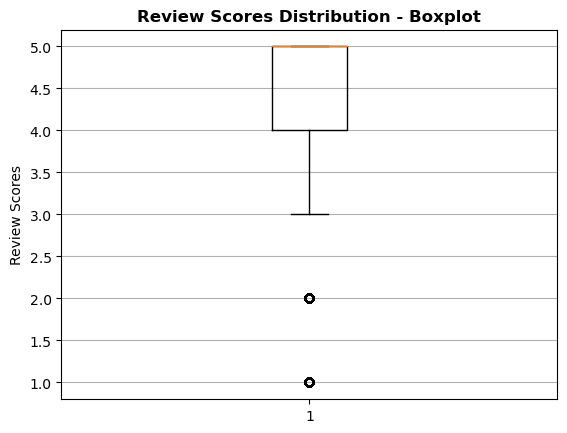

In [17]:
# Check the distribution of the client's score rates

plt.style.use('default')
plt.title("Review Scores Distribution - Boxplot",fontweight="bold", fontsize=12)
plt.boxplot(df_orderReviews["review_score"], manage_ticks=True)
plt.grid(axis='y')
plt.ylabel("Review Scores")

<a id='crsdy'></a>

## Customer's Review Scores - Density

Text(0.5, 0, 'Stars')

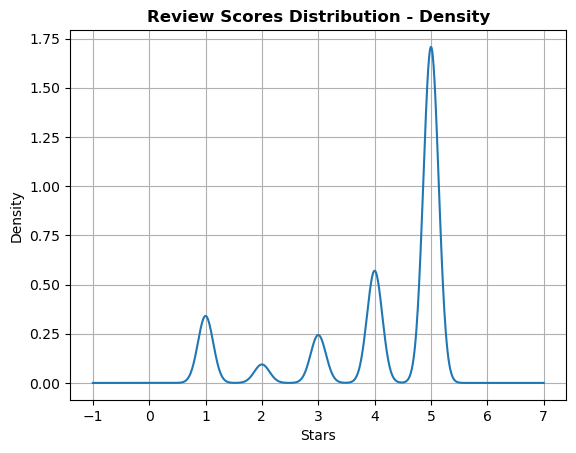

In [18]:
# Check the density distribution to check how the clients are ratings their experiences. 

df_orderReviews["review_score"].plot.density()
plt.title("Review Scores Distribution - Density",fontweight="bold", fontsize=12)
plt.grid()
plt.xlabel("Stars")

<a id='crsdn'></a>

## Customer's Review Scores - Description

In [19]:
# Describe the review scores to check the actual values of the ratings.

df_orderReviews["review_score"].describe()

count    99224.000000
mean         4.086421
std          1.347579
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

# Sails per Category
Objective - Discover what categories of products are selling the most.

In [20]:
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [21]:
df_orderItems

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [22]:
df_categoryNameTrans

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [23]:
# Drop the columns that won't matter for this analysis

df_products_treated = df_products.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 
                                        'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'],
                                         axis="columns")

df_orderItems_treated = df_orderItems.drop(['order_item_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value'],
                                          axis="columns")

In [24]:
# Merge the df_products and the df_orderItems dataframes.

df_categories_sold = pd.merge(df_products_treated, df_orderItems_treated, on="product_id")

In [25]:
# Now, merge the dataframe that contains the translation of the categories.

df_categories_sold = pd.merge(df_categories_sold, df_categoryNameTrans, on="product_category_name")

In [26]:
df_categories_sold

,product_id,product_category_name,order_id,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,048cc42e03ca8d43c729adf6962cb348,perfumery
2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,5fa78e91b5cb84b6a8ccc42733f95742,perfumery
3,0d009643171aee696f4733340bc2fdd0,perfumaria,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,perfumery
4,0d009643171aee696f4733340bc2fdd0,perfumaria,7b13c77c64a9a956500cbf1a9a23798d,perfumery
...,...,...,...,...
111018,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicais,7ed69fbc79fbda50e09caa9c127026e5,cds_dvds_musicals
111019,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicais,9c782cb7854e5dfa91927cfca8949eb8,cds_dvds_musicals
111020,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicais,cea54c1853c864ab36cea3ef732d7191,cds_dvds_musicals
111021,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicais,d4e8d3bb5e3673ed68ac154fe86de946,cds_dvds_musicals


<a id='spc'></a>

Text(0, 0.5, 'Items Sold')

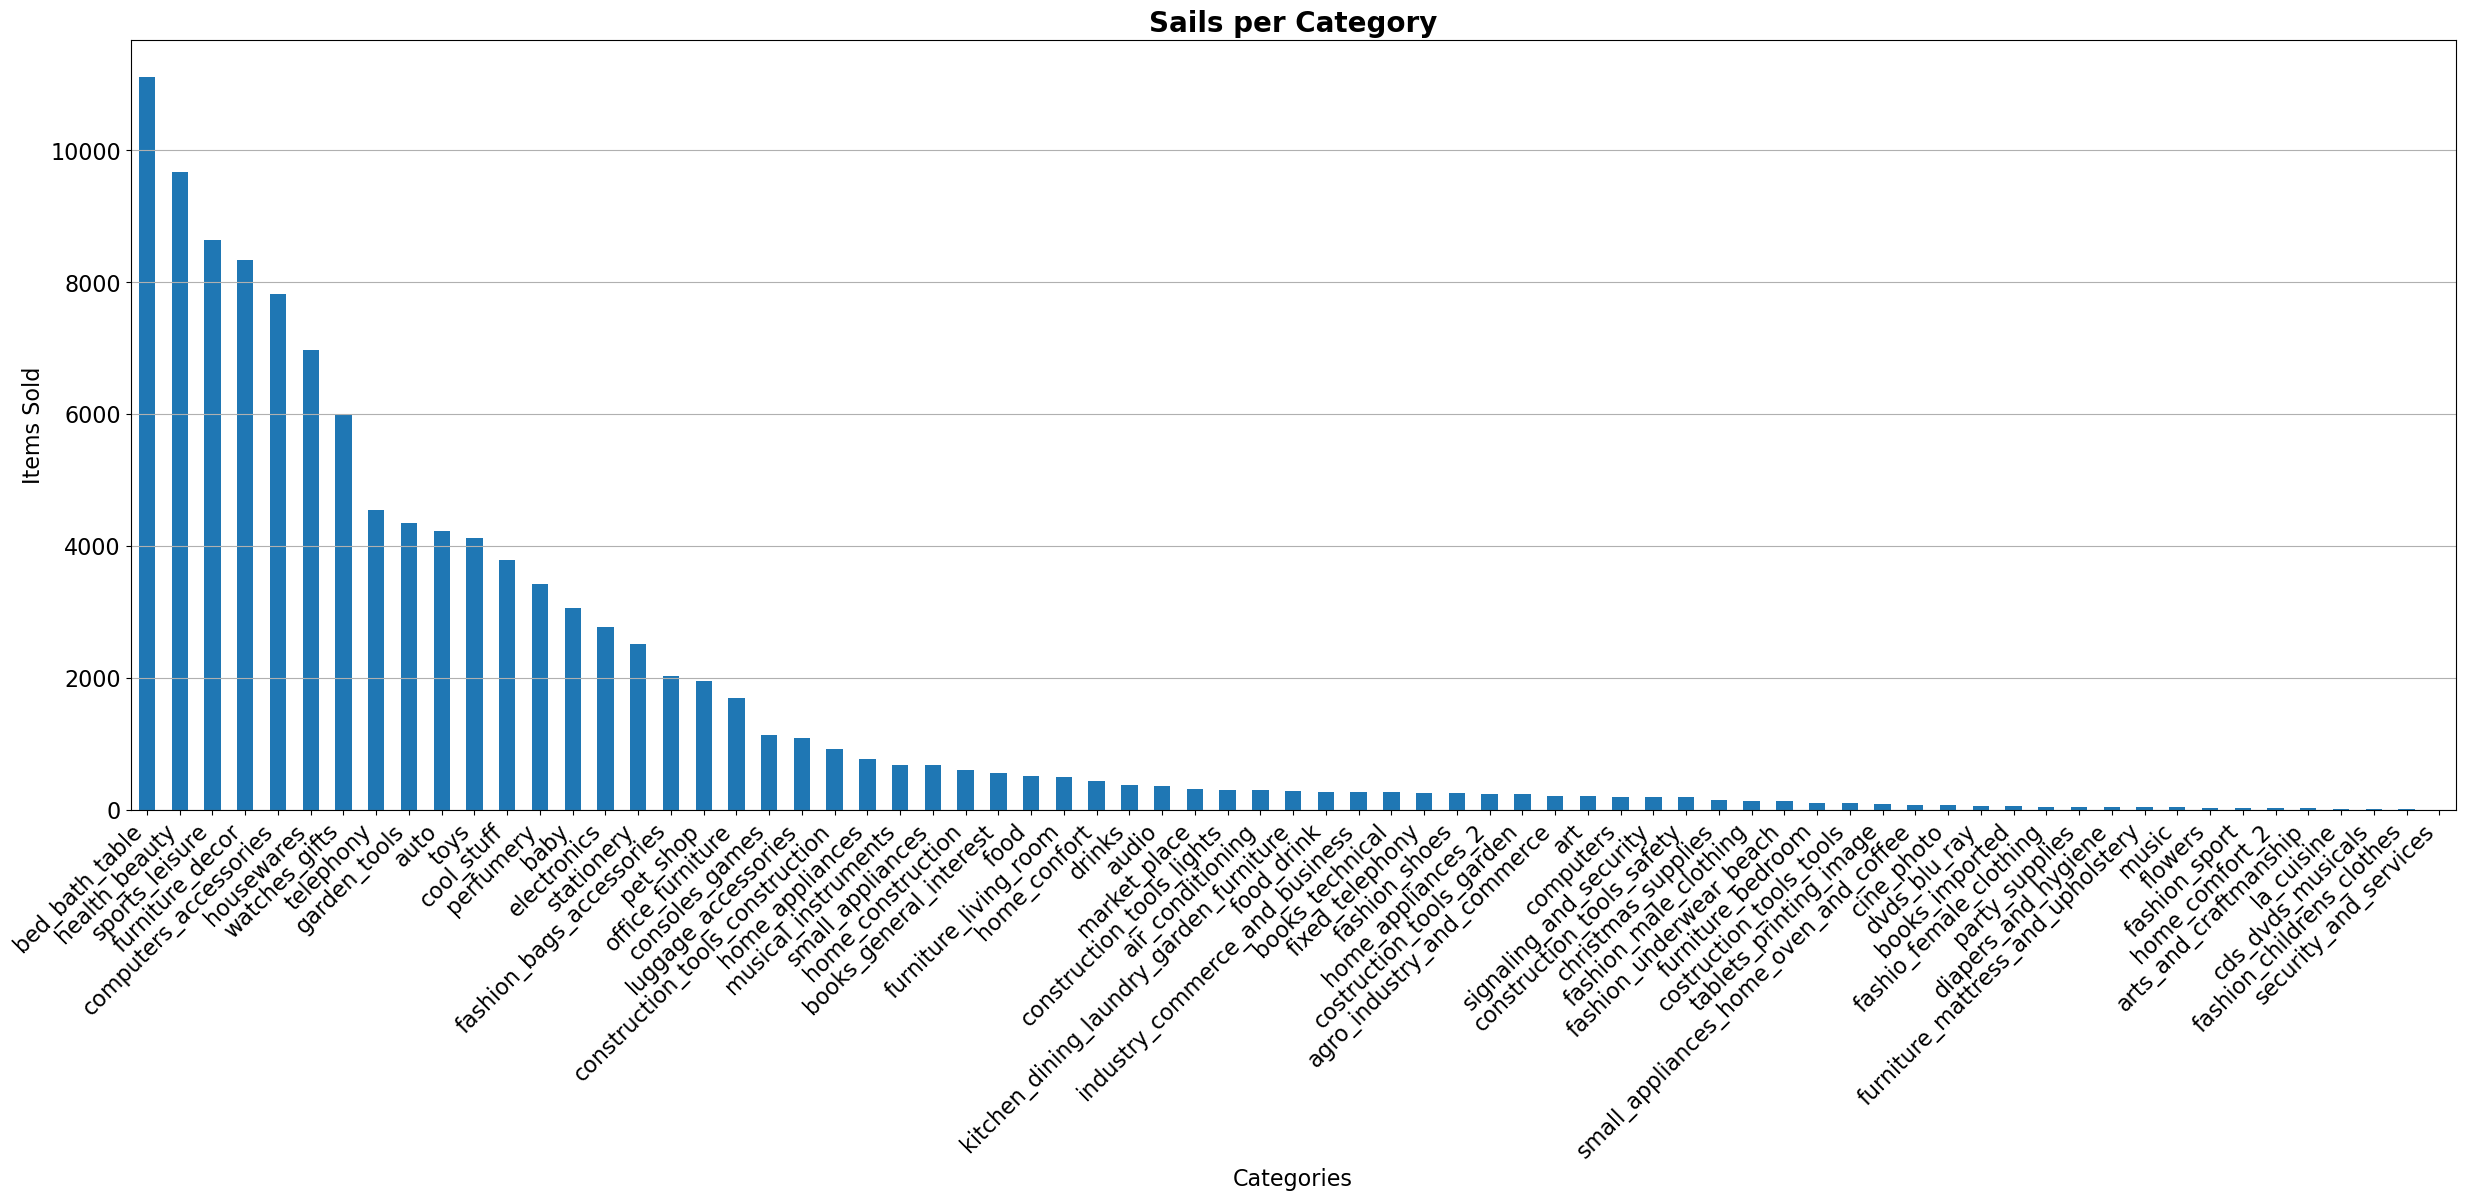

In [27]:
# Check how many products of each category was sold by checking how many times each category appears in the merged dataframe.

df_categories_sold.groupby('product_category_name_english').size().sort_values(ascending=False).plot.bar(figsize=(30,10))
plt.title("Sails per Category",fontweight="bold", fontsize=20)
plt.xticks(rotation=45, ha="right", fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis = 'y')
plt.xlabel("Categories", fontsize=16)
plt.ylabel("Items Sold", fontsize=16)

## Best Selling Categories - Top 20

<a id='bsct20'></a>

Text(0, 0.5, 'Items Sold')

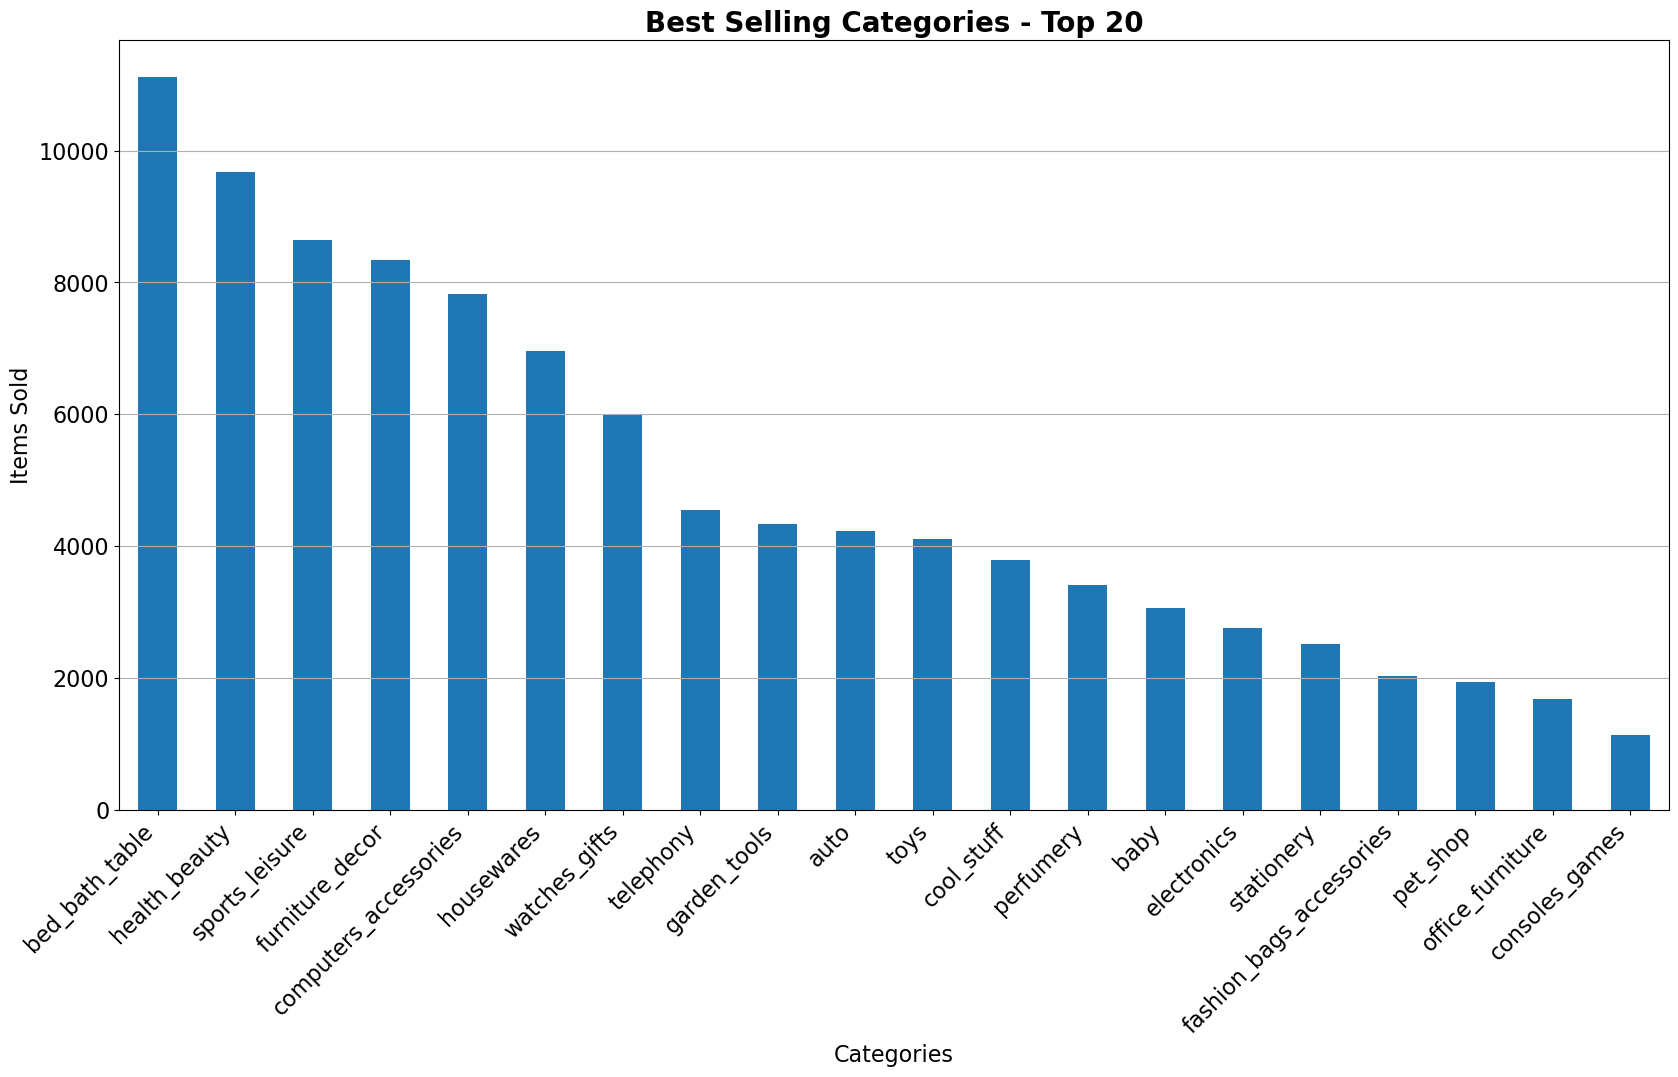

In [28]:
# Get the best 20 selling categories.

df_categories_sold.groupby('product_category_name_english').size().sort_values(ascending=False).head(20).plot.bar(figsize=(20,10))
plt.title("Best Selling Categories - Top 20",fontweight="bold", fontsize=20)
plt.xticks(rotation=45, ha="right", fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis = 'y')
plt.xlabel("Categories", fontsize=16)
plt.ylabel("Items Sold", fontsize=16)

# Revenue x Month (From 2016 to 2018)
Obective - Check the evolution of revenue in the dataset provided.

In [29]:
df_orderItems

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [30]:
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [31]:
# Since only the orders that were delivered are the ones that generated revenue, the orders with different order_status will not
# matter for this analysis

df_orders.groupby("order_status").size()

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
dtype: int64

In [32]:
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [33]:
# Drop the rows that do not registered a delivery date, because those are the ones that don't have a "delivered" status

df_orders_effective = df_orders.dropna(subset=['order_delivered_customer_date'])

In [34]:
# Join the dataframe with only "delivered" items with the df_orderItems so we can see the prices of each delivered item.

df_orders_join = df_orders_effective.set_index('order_id').join(df_orderItems.set_index('order_id'))
df_orders_join

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
order_id,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95


<a id='rxm'></a>

Text(0, 0.5, 'Revenue')

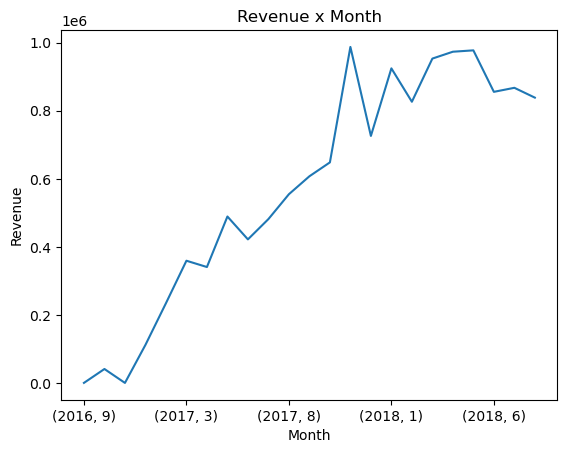

In [35]:
# Plot the revenue x month in each year

df_orders_join.groupby([df_orders_join["order_purchase_timestamp"].astype("datetime64").dt.year, 
                        df_orders_join["order_purchase_timestamp"].astype("datetime64").dt.month])["price"].sum().plot(title="Revenue x Month")
plt.xlabel("Month")
plt.ylabel("Revenue")
